In [27]:
### Los datos son del repositorio de UCI
### Aquí detectamos los valores atípicos que serán justamente los clientes fraudulentos
## Necesitamos calcular la MID ((Mean Inter-Neuron Distance(Distancia media 
## entre neuronas)), que es la distancia euclidia media de la neurona principal con su vecin
### Los valores atípicos estarán lejos de la media
### Clase 1 son los clientes cuyas solicitudes fueron aprobadas
### Pueden ser fraudulentos

In [28]:

# Importando las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [29]:
# Importando el conjunto de datos

dataset = pd.read_csv('Credit_Card_Applications.csv')



In [30]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [31]:
# iloc obtiene índices de observación, todas las líneas que usamos: y todas las columnas excepto
# por último: -1 y valores

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [32]:
dataset.shape

(690, 16)

In [33]:
# dividir el conjunto de datos en X e Y, sin intentar hacer un aprendizaje supervisado o una clasificación 0 o 1
# haciendo distinción de clientes aprobados y no aprobados, solo usaremos el SOM con
# X y no hay variable dependiente

# Escalado de características: obligatorio para el aprendizaje profundo porque estamos comenzando con un alto
# conjunto de datos dimensionales con muchas relaciones no lineales y será mucho más fácil
# para que nuestros modelos de aprendizaje profundo  si las características se escalan.
# utiliza la normalización todas las funciones de 0 a 1

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))


In [34]:
# ajusta el objeto sc a X para que sc obtenga toda la información (min y max) y toda la información para la normalización
# aplica la normalización a X, el método de ajuste devuelve la versión normalizada de X


X = sc.fit_transform(X)

In [35]:
# Entrenando el SOM

### x e y son las dimensiones del SOM (no debe ser pequeño para que se puedan detectar valores atípicos)
### input_len son el número de características de X (la identificación del cliente se incluye para encontrar la identificación de los infractores)
### sigma es el radio
# Aprendizaje no supervisado,
# sigma es el radio de los diferentes vecindades
# razon de aprendizaje, el hiperparámetro decide cuánto se añade de cada incremento de peso, 
# mayores tasas de aprendizaje, pueden hacer más rápida la convergencia
# Tasa de aprendizaje bajas hacen que el entrenamiento pueda ir mas lento,

from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
#som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
#som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.05)



In [36]:
# inicializa aleatoriamente los vectores de pesos a números pequeños cercanos a 0

som.random_weights_init(X)

In [37]:
# entrenar SOM con X, matriz de características y patrones reconocidos

# som.train_random(data = X, num_iteration = 5000)
som.train_random(data = X, num_iteration = 5000, verbose=1)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.40497309516220786


In [13]:
# Visualizando los resultados
# cuadrícula bidimensional de los nodos ganadores


### Cuanto mayor sea la distancia media entre neuronas MID, más lejos estará el nodo ganador de su vecindario
### por lo tanto, será más probable que sea un valor atípico
### La BMU lejos de su vecindario generalmente está lejos de los clústeres
### los colores más cercanos al blanco son valores atípicos




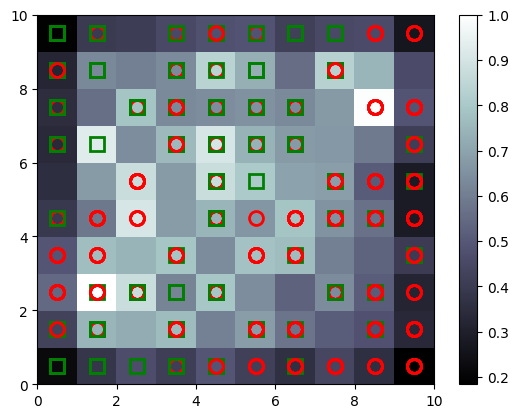

In [38]:

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
mappings=som.win_map(X)

defaultdict(<class 'list'>, {(9, 3): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
       0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.89100585, 1.        , 0.09398496, 0.39446429, 0.5       ,
       0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.068     , 0.        ]), array([0.59042402, 1.        , 0.20556391, 0.44642857, 0.5       ,
       0.38461538, 0.5       , 0.00877193, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.36      , 0.        ]), array([0.89857005, 1.        , 0.05639098, 0.78571429, 1.        ,
       0.        , 0.75      , 0.        , 0.        , 0.        ,
       0.       

In [ ]:
## Recuerda que las coordenadas de matriz que tienes que poner abajo
## para presentar los individuos candidatos a fraude son aquellas 
## coordenadas cuya neurona haya agrupado individuos con distancia 
## maxima a la promedio representados por color blanco

In [43]:
fraudes=np.array(mappings[5,8])
print(fraudes.shape)

(8, 15)


In [44]:
fraudes=sc.inverse_transform(fraudes)

In [45]:
fraudesInt=fraudes.astype(int)
fraudesInt

array([[15678882,        1,       39,       13,        2,        9,
               4,        8,        1,        1,        6,        1,
               2,       70,        1],
       [15671769,        1,       56,       12,        2,        7,
               4,        1,        1,        1,        4,        1,
               2,      200,        1],
       [15774262,        1,       29,       14,        2,        6,
               4,        5,        1,        1,        5,        1,
               2,      168,        1],
       [15750921,        1,       49,        7,        2,        3,
               5,        7,        1,        1,       15,        1,
               2,        0,     5001],
       [15728010,        1,       60,       14,        2,        1,
               1,       18,        1,        1,       15,        1,
               2,        0,     1001],
       [15689268,        1,       54,        9,        2,        1,
               1,       14,        1,        1,       11,

In [ ]:
### A continuación pintaremos la matriz de distancias del SOM y
### contaremos aquellos clientes que superen la distancia de 0.5 
### puesto que serán los posibles clientes fraudulentos
### esta es otra forma de ver posibles candidatos

In [46]:
distance_map = som.distance_map().round(1)

In [47]:
distance_map

array([[0.2, 0.4, 0.5, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2],
       [0.4, 0.7, 1. , 0.8, 0.6, 0.7, 0.9, 0.6, 0.6, 0.4],
       [0.5, 0.7, 0.9, 0.7, 0.9, 0.9, 0.6, 0.8, 0.6, 0.4],
       [0.4, 0.8, 0.6, 0.8, 0.7, 0.7, 0.8, 0.6, 0.6, 0.5],
       [0.5, 0.6, 0.8, 0.6, 0.7, 0.9, 0.9, 0.6, 0.8, 0.5],
       [0.4, 0.7, 0.6, 0.8, 0.7, 0.8, 0.7, 0.7, 0.7, 0.5],
       [0.4, 0.6, 0.5, 0.8, 0.8, 0.7, 0.7, 0.6, 0.6, 0.4],
       [0.4, 0.5, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.8, 0.4],
       [0.4, 0.5, 0.5, 0.5, 0.6, 0.5, 0.6, 1. , 0.7, 0.5],
       [0.2, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.5, 0.5, 0.3]])

In [49]:
index = []
for i in range(10):
    for j in range(10):
        if(distance_map[i,j]>=0.5):
            index.append([i,j])
len(index)

74